# Mapa das escolas do RS por taxa de distorção de série

Base de dados: https://dados.rs.gov.br/dataset/fee-taxa-de-distorcao-idade-serie-total-102512/resource/c91f5b9c-466a-4c78-814c-b2a153f88180


In [1]:
# pip permite instalar novas bibliotecas
# ! permite a execução de comandos diretamente no jupyter notebook
!pip install folium

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#import pandas as pd

import pandas as pd
%matplotlib inline
import folium

In [3]:
# Carregando o arquivo csv
df = pd.read_csv('fee-2013-mun-taxa-de-distorcao-idade-serie-total-102512.csv',
              encoding='latin1', skiprows=1)
df.head()

,Município,ibge,latitude,longitude,/Educação/Ens...de Série/Total 2013 (-)
0,Aceguá,4300034,-31.86076,-54.16706,"23,9"
1,Água Santa,4300059,-28.16720,-52.03100,"16,9"
2,Agudo,4300109,-29.64470,-53.25150,"26,7"
3,Ajuricaba,4300208,-28.23420,-53.77570,"13,2"
4,Alecrim,4300307,-27.65790,-54.76490,"22,9"


In [4]:
#renomeando colunas
df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)': 'tx_distorcao'}, inplace=True)

df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,"23,9"
1,Água Santa,4300059,-28.16720,-52.03100,"16,9"
2,Agudo,4300109,-29.64470,-53.25150,"26,7"
3,Ajuricaba,4300208,-28.23420,-53.77570,"13,2"
4,Alecrim,4300307,-27.65790,-54.76490,"22,9"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 5 columns):
Município       497 non-null object
ibge            497 non-null int64
latitude        497 non-null float64
longitude       497 non-null float64
tx_distorcao    497 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 19.5+ KB


In [6]:
#Vamos converter tx_distorcao para float

#primeiro vamos trocar virgula por oonto
df['tx_distorcao'] = df['tx_distorcao'].str.replace(',','.')

In [7]:
df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,23.9
1,Água Santa,4300059,-28.16720,-52.03100,16.9
2,Agudo,4300109,-29.64470,-53.25150,26.7
3,Ajuricaba,4300208,-28.23420,-53.77570,13.2
4,Alecrim,4300307,-27.65790,-54.76490,22.9


In [8]:
#Fazendo a conversão
df['tx_distorcao'] = df['tx_distorcao'].astype(float)
df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,23.9
1,Água Santa,4300059,-28.16720,-52.03100,16.9
2,Agudo,4300109,-29.64470,-53.25150,26.7
3,Ajuricaba,4300208,-28.23420,-53.77570,13.2
4,Alecrim,4300307,-27.65790,-54.76490,22.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 5 columns):
Município       497 non-null object
ibge            497 non-null int64
latitude        497 non-null float64
longitude       497 non-null float64
tx_distorcao    497 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.5+ KB


In [10]:
# Os 10 municípios com a menor taxa de distorcao

df.nsmallest(10, 'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
37,Barra do Rio Azul,4301925,-27.4068,-52.4084,4.5
376,Santo Antônio do Palma,4317558,-28.4956,-52.0267,4.7
38,Barra Funda,4301958,-27.9205,-53.0391,4.8
127,David Canabarro,4306304,-28.3849,-51.8482,5.3
351,Rondinha,4316204,-27.8315,-52.9081,5.8
357,Salvador das Missões,4316477,-28.1233,-54.8373,6.0
246,Mariano Moro,4312005,-27.3568,-52.1467,6.6
96,Centenário,4305116,-27.7616,-51.9984,6.9
192,Horizontina,4309605,-27.6282,-54.3053,7.0
393,São José do Inhacorá,4318499,-27.7251,-54.1275,7.2


In [11]:
# Os 10 municípios com a maior taxa de distorcao

df.nlargest(10, 'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
415,São Valério do Sul,4319737,-27.7906,-53.9368,46.6
104,Charrua,4305371,-27.9493,-52.0150,44.9
143,Engenho Velho,4306924,-27.7060,-52.9145,39.5
364,Santa Margarida do Sul,4316972,-30.3296,-54.0823,38.3
475,Vale do Sol,4322533,-29.5967,-52.6839,37.2
98,Cerro Branco,4305132,-29.6570,-52.9406,35.6
176,General Câmara,4308805,-29.9032,-51.7612,35.6
253,Minas do Leão,4312252,-30.1346,-52.0423,34.5
339,Redentora,4315404,-27.6640,-53.6407,33.7
394,São José do Norte,4318507,-32.0151,-52.0331,33.6


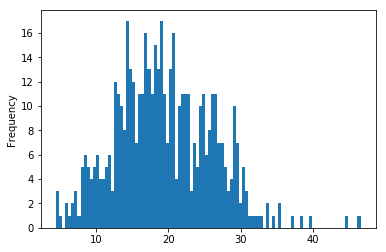

In [12]:
# Plotar o histograma de distorção

df['tx_distorcao'].plot.hist(bins=100)

In [13]:
#Quantidade de municipios com tx_distorção menor ou igual a 10

df[df['tx_distorcao'] <=10].count()

Município       38
ibge            38
latitude        38
longitude       38
tx_distorcao    38
dtype: int64

In [14]:
#Quantidade de municipios com tx_distorção maior ou igual a 45

df[df['tx_distorcao'] >=45].count()

Município       1
ibge            1
latitude        1
longitude       1
tx_distorcao    1
dtype: int64

In [15]:
#vamos aprender como folium funciona
# Criar um mapa, com base em uma coordenada central

brasil= folium.Map(
    location= [-13.702797,-69.6865109], #coordenadas do google maps
    zoom_start =4
)

#mostrando mapa
brasil

In [16]:
#vamos aprender como folium funciona
# Criar um mapa, com base em uma coordenada central

rs= folium.Map(
    #location= [-30.3292233,-58.1665324], #coordenadas do google maps
    location= [-30.5,-52], #coordenadas ajustadas
    zoom_start =6
)

#mostrando mapa
rs

In [20]:
# Percorrer o dataframe com base nas melhhores escolas (tx_distorcao <=10)
#e desenhar um marcador para cada escola

#usando for e iterrows

for indice, municipio in df[df['tx_distorcao'] <=10].iterrows():
    folium.Marker(
        location=[municipio['latitude'], municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='green')
    ).add_to(rs)
    
    rs

In [18]:
# Percorrer o dataframe com base nas piores escolas (tx_distorcao >=45)
#e desenhar um marcador para cada escola

#usando for e iterrows

for indice, municipio in df[df['tx_distorcao'] >=45].iterrows():
    folium.Marker(
        location=[municipio['latitude'], municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='red')
    ).add_to(rs)
    
    rs

In [19]:
#Qual a taxa de distoeção de PA

df[df['Município'] == 'Porto Alegre']['tx_distorcao']

325    27.2
Name: tx_distorcao, dtype: float64